## Decision Trees (CART) Algorithm 

http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

Decision trees are a recursive divide and conquer algorithm. They are a non-linear, non-parametric discriminative supervised classification algorithm. There are a few names of decision tree algorithms you may have heard of (ID3, C4.5, CART, etc.) and each is a different specification of a decision tree model.

## Play Golf Dataset
When implementing any ML algorithm for the first time, it is often easier to start with a trivially simple data set. You should always focus on one portion of the pipeline at a time: we do not want worry about cleaning data during feature selection just as we do not want to worry about feature engineering when writing our model building code. We will be using the canonical 'Play Golf' dataset when writing our algorithm.

Look at the playgolf.csv is the folder. You will also see a dataset with just the categorial features and one with just the continuous features. Starting with just categorical features may be easier for implementation.

### Pseudo-code
Here's the pseudocode for the algorithm you will be implementing.:

```
function BuildTree:
    If every item in the dataset is in the same class
    or there is no feature left to split the data:
        return a leaf node with the class label
    Else:
        find the best feature and value to split the data
        split the dataset
        create a node
        for each split
            call BuildTree and add the result as a child of the node
        return node
```

## Implementation

We are going to build the algorithm using OOP. Don't worry most of it has been pre-filled for you. Your job is to fill the methods we left aside.


In [3]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from treenode import TreeNode # pip install treenode

In [4]:
df = pd.read_csv('./playgolf.csv')

In [5]:
df.head()

,Outlook,Temperature,Humidity,Windy,Result
0,sunny,85,85,False,Don't Play
1,sunny,80,90,True,Don't Play
2,overcast,83,78,False,Play
3,rain,70,96,False,Play
4,rain,68,80,False,Play


## Steps to Implementing

We will be implementing the CART algorithm. This means that every split will be binary. For categorical features, splits will be like: sunny or not sunny. For continuous features, splits will be like: ```<80 or >=80```.

## Implement the _entropy method, 

It is given by the following equation. Entropy measures the amount of "disorder" in a set. Here there are m classes in the set and ci is the i-th class of our target y.

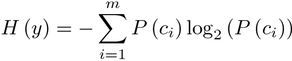

P(c) = (count of occurrences of class c) / size of y

Note that to calculate entropy, you only need the labels (y values) and none of the feature values.

In [6]:
def _entropy(y):
    '''
    INPUT: - y: 1d numpy array
    OUTPUT: - float
    Return the entropy of the array y.
    '''
    n = y.shape[0]
    summation = 0
    for c_i in np.unique(y):
        prob = sum(y == c_i) / float(n)
        summation += prob * np.log2(prob)
    return -summation

In [7]:
from scipy.stats import entropy

In [8]:
ybi = df.Result.map(lambda x: 1 if x == 'Play' else 0)

In [9]:
p = sum(ybi)/float(len(ybi))
entropy([p,(1-p)], base=2)

0.9402859586706311

In [10]:
_entropy(df.Result)

0.9402859586706311

## Implement the _gini method. 

Your information gain method will be able to use either gini or entropy. Use the following formula to implement the Gini entropy.
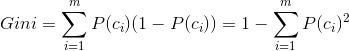

In [11]:
def _gini(y):
    '''
    INPUT: - y: 1d numpy array
    OUTPUT: - float
    Return the gini impurity of the array y.
    '''
    n = y.shape[0]
    summation = 0
    for c_i in np.unique(y):
        prob = sum(y == c_i) / float(n)
        summation += prob**2
    return 1 - summation


In [12]:
_gini(df.Result)

0.4591836734693877

## Implement the _make_split method

This should take the index of the feature and the value of the feature and make the split of the data into two subsets. Note that for categorical features this should split on weather it's equal to the value of not. For continuous, it should split on < or >=.

In [13]:
def _make_split( X, y, split_index, split_value):
    '''
    INPUT:
        - X: 2d numpy array
        - y: 1d numpy array
        - split_index: int (index of feature)
        - split_value: int/float/bool/str (value of feature)
    OUTPUT:
        - X1: 2d numpy array (feature matrix for subset 1)
        - y1: 1d numpy array (labels for subset 1)
        - X2: 2d numpy array (feature matrix for subset 2)
        - y2: 1d numpy array (labels for subset 2)

    Return the two subsets of the dataset achieved by the given feature and
    value to split on.
    '''
    if is_categorical:
        idx = X[:, split_index] == split_value
    else:
        idx = X[:, split_index] < split_value
    return X[idx], y[idx], X[idx == False], y[idx == False]

## Implement the _information_gain method 

This should take a split (the result of the _make_split method) and return the value of the information gain.

In [14]:
def _information_gain(y, y1, y2):
    '''
    INPUT:
        - y: 1d numpy array
        - y1: 1d numpy array (labels for subset 1)
        - y2: 1d numpy array (labels for subset 2)
    OUTPUT:
        - float

    Return the information gain of making the given split.

    Use impurity_criterion(y) (as an argument) rather than calling _entropy or _gini
    directly.
    '''
    n = y.shape[0]
    child_inf = 0
    for y_i in (y1, y2):
        child_inf += impurity_criterion(y_i) * y_i.shape[0] / float(n)
    return impurity_criterion(y) - child_inf


## The TreeNode class is implemented. These are the instance variables:

- column (int): index of feature to split on
- split_value (object): value of the feature to split on
- categorical (bool): whether or not node is split on a categorial feature (vs continuous)
- name (string): name of the feature (or name of the class in the case of a list)
- left (TreeNode): left child
- right (Tree Node): right child
- leaf (boolean): true or false depending on if the node is a leaf node.
- classes (Counter): if a leaf, a count of all the list of all the classes of the data points - that terminate at this leaf. Can be used to assess how "accurate" an individual leaf is.

The as_string and __str__ functions are designed to print out the decision tree (mostly for debugging).

The __init__, fit, _build_tree and __str__ methods are already implemented for you. You will need to implement the other ones.

### In the following class, replace the empty methods with the ones you just created (be carefull of adding the (self variable and calling the right class variable in your functions) :

In [15]:

class DecisionTree(object):
    '''
    A decision tree class.
    '''

    def __init__(self, impurity_criterion='entropy'):
        '''
        Initialize an empty DecisionTree.
        '''

        self.root = None  # root Node
        self.feature_names = None  # string names of features (for interpreting
                                   # the tree)
        self.categorical = None  # Boolean array of whether variable is
                                 # categorical (or continuous)
        self.impurity_criterion = self._entropy \
                                  if impurity_criterion == 'entropy' \
                                  else self._gini

    def fit(self, X, y, feature_names=None):
        '''
        INPUT:
            - X: 2d numpy array
            - y: 1d numpy array
            - feature_names: numpy array of strings
        OUTPUT: None

        Build the decision tree.
        X is a 2 dimensional array with each column being a feature and each
        row a data point.
        y is a 1 dimensional array with each value being the corresponding
        label.
        feature_names is an optional list containing the names of each of the
        features.
        '''

        if feature_names is None or len(feature_names) != X.shape[1]:
            self.feature_names = np.arange(X.shape[1])
        else:
            self.feature_names = feature_names

        # Create True/False array of whether the variable is categorical
        is_categorical = lambda x: isinstance(x, str) or \
                                   isinstance(x, bool) or \
                                   isinstance(x, unicode)
        self.categorical = np.vectorize(is_categorical)(X[0])

        self.root = self._build_tree(X, y)

    def _build_tree(self, X, y):
        '''
        INPUT:
            - X: 2d numpy array
            - y: 1d numpy array
        OUTPUT:
            - TreeNode

        Recursively build the decision tree. Return the root node.
        '''

        node = TreeNode()
        index, value, splits = self._choose_split_index(X, y)

        if index is None or len(np.unique(y)) == 1:
            node.leaf = True
            node.classes = Counter(y)
            node.name = node.classes.most_common(1)[0][0]
        else:
            X1, y1, X2, y2 = splits
            node.column = index
            node.name = self.feature_names[index]
            node.value = value
            node.categorical = self.categorical[index]
            node.left = self._build_tree(X1, y1)
            node.right = self._build_tree(X2, y2)
        return node

    def _entropy(self, y):
        '''
        INPUT:
            - y: 1d numpy array
        OUTPUT:
            - float

        Return the entropy of the array y.
        '''
        n = y.shape[0]
        summation = 0
        for c_i in np.unique(y):
            prob = sum(y == c_i) / float(n)
            summation += prob * np.log2(prob)
        return -summation

    def _gini(self, y):
        '''
        INPUT:
            - y: 1d numpy array
        OUTPUT:
            - float

        Return the gini impurity of the array y.
        '''
        n = y.shape[0]
        summation = 0
        for c_i in np.unique(y):
            prob = sum(y == c_i) / float(n)
            summation += prob**2
        return 1 - summation

    def _make_split(self, X, y, split_index, split_value):
        '''
        INPUT:
            - X: 2d numpy array
            - y: 1d numpy array
            - split_index: int (index of feature)
            - split_value: int/float/bool/str (value of feature)
        OUTPUT:
            - X1: 2d numpy array (feature matrix for subset 1)
            - y1: 1d numpy array (labels for subset 1)
            - X2: 2d numpy array (feature matrix for subset 2)
            - y2: 1d numpy array (labels for subset 2)

        Return the two subsets of the dataset achieved by the given feature and
        value to split on.

        Call the method like this:
        >>> X1, y1, X2, y2 = self._make_split(X, y, split_index, split_value)

        X1, y1 is a subset of the data.
        X2, y2 is the other subset of the data.
        '''
        if self.categorical[split_index]:
            idx = X[:, split_index] == split_value
        else:
            idx = X[:, split_index] < split_value
        return X[idx], y[idx], X[idx == False], y[idx == False]

    def _information_gain(self, y, y1, y2):
        '''
        INPUT:
            - y: 1d numpy array
            - y1: 1d numpy array (labels for subset 1)
            - y2: 1d numpy array (labels for subset 2)
        OUTPUT:
            - float

        Return the information gain of making the given split.

        Use self.impurity_criterion(y) rather than calling _entropy or _gini
        directly.
        '''
        n = y.shape[0]
        child_inf = 0
        for y_i in (y1, y2):
            child_inf += self.impurity_criterion(y_i) * y_i.shape[0] / float(n)
        return self.impurity_criterion(y) - child_inf

    def _choose_split_index(self, X, y):
        '''
        INPUT:
            - X: 2d numpy array
            - y: 1d numpy array
        OUTPUT:
            - index: int (index of feature)
            - value: int/float/bool/str (value of feature)
            - splits: (2d array, 1d array, 2d array, 1d array)

        Determine which feature and value to split on. Return the index and
        value of the optimal split along with the split of the dataset.

        Return None, None, None if there is no split which improves information
        gain.

        Call the method like this:
        >>> index, value, splits = self._choose_split_index(X, y)
        >>> X1, y1, X2, y2 = splits
        '''
        split_index, split_value, splits = None, None, None
        gain = 0
        for i in xrange(X.shape[1]):
            values = np.unique(X[:, i])
            if len(values) < 1:
                continue
            for value in values:
                X1, y1, X2, y2 = self._make_split(X, y, i, value)
                new_gain = self._information_gain(y, y1, y2)
                if new_gain > gain:
                    split_index = i
                    split_value = value
                    splits = (X1, y1, X2, y2)
                    gain = new_gain
        return split_index, split_value, splits

    def predict(self, X):
        '''
        INPUT:
            - X: 2d numpy array
        OUTPUT:
            - y: 1d numpy array

        Return an array of predictions for the feature matrix X.
        '''

        return np.array([self.root.predict_one(row) for row in X])

    def __str__(self):
        '''
        Return string representation of the Decision Tree.
        '''
        return str(self.root)
